In [3]:
import copy
from   random import choice
import math 

import numpy as np
from   sklearn.cluster import HDBSCAN, DBSCAN
import hdbscan

from matplotlib.patches import Circle
from matplotlib.lines import Line2D

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import NaiveDE
import SpatialDE
import pandas as pd

import networkx as nx

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


from plot import *
from data import *
from filt import *
from filt import ITNI, ITSNI, VNI

from scipy.optimize import minimize
from scipy.stats import nbinom

scdata     = load_data()
array_data = scdata.X.toarray().T

### map from index of spot to cartesian coordinates
index_to_cart = np.zeros((len(scdata.obs), 2))
max_row       = scdata.obs['array_row'].max()
for i, ind in enumerate(scdata.obs.index):
    col = scdata.obs['array_col'][ind]
    row = scdata.obs['array_row'][ind]
    index_to_cart[i, 0] = col             * (np.sqrt(3)/2)
    index_to_cart[i, 1] = (max_row - row) * (3/2)


c:\Users\Workstation\magistrale\algo_ai\Lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
c:\Users\Workstation\magistrale\algo_ai\Lib\site-packages\numba\core\decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
c:\Users\Workstation\magistrale\algo_ai\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
c:\Users\Workstation\magistrale\algo_ai\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_

In [24]:
W  = '#efefd0'
B  = '#004e89'
Or = "#ff6b35"
mpl.rcParams['text.color']       = B
mpl.rcParams['axes.labelcolor']  = B
mpl.rcParams['axes.edgecolor']   = B
mpl.rcParams['axes.facecolor']   = W
mpl.rcParams['figure.facecolor'] = W
mpl.rcParams['xtick.color']      = B
mpl.rcParams['ytick.color']      = B
mpl.rcParams['font.family']      = "monospace"

c1 = "#35cde2"
c2 = "#ab2b2b"

colors    = [B, Or]
cmap_name = "balck_yellow"
myCMAP    = LinearSegmentedColormap.from_list(cmap_name, colors)

def plot_scatter_square(gdata, ax):
    plot_spatial_scatter(
        scdata, 
        gdata, 
        cmap         = myCMAP, 
        spines_color = W, 
        size         = 1.5, 
        shape        = "square",
        ax           = ax)

In [5]:
import seaborn as sns
import sklearn.datasets as data


sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [6]:
transf_gdata = np.load("trasnformed_gdata.npy")

In [21]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(transf_gdata)

HDBSCAN(gen_min_span_tree=True)

<Axes: ylabel='distance'>

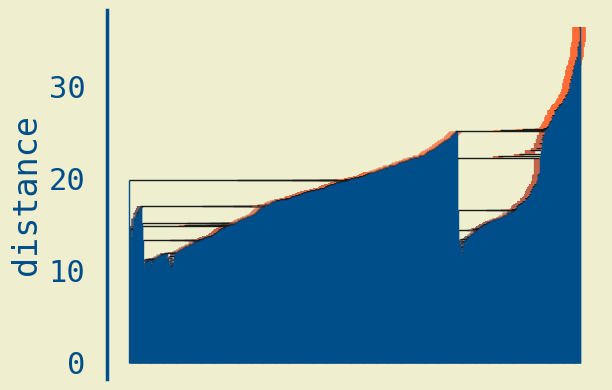

In [21]:
clusterer.single_linkage_tree_.plot(cmap=myCMAP, colorbar=False)

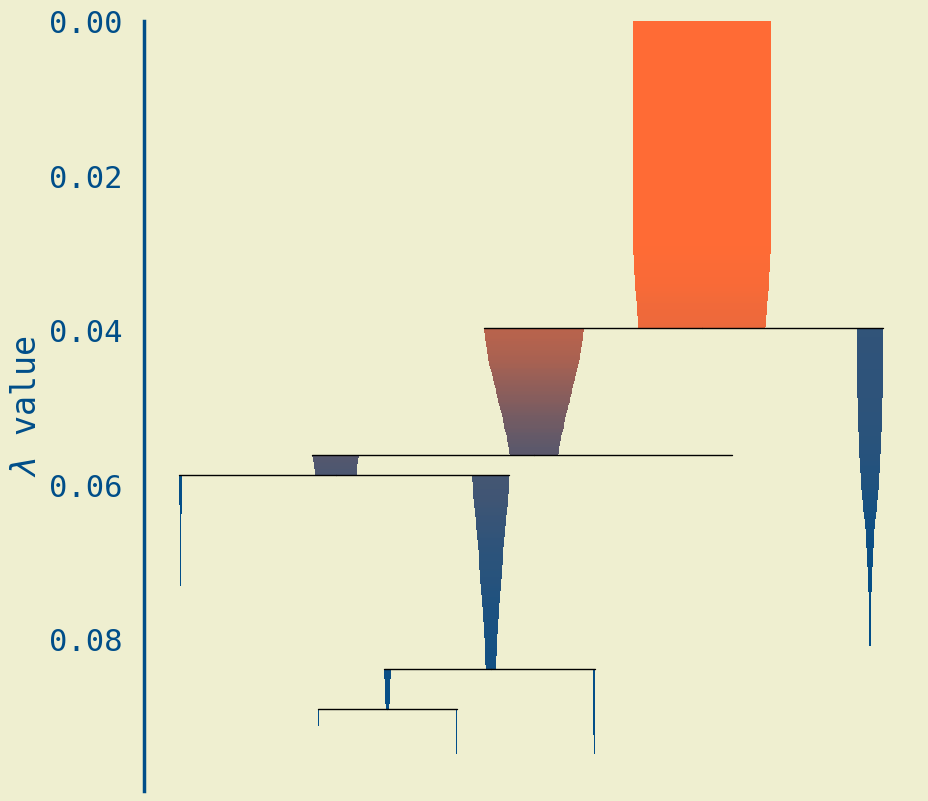

In [ ]:
import matplotlib 

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)

clusterer.condensed_tree_.plot(leaf_separation=1, cmap=myCMAP, colorbar=False, select_clusters=False, axis=plt.gca(), max_rectangles_per_icicle=1000)
#plt.gca().set_ylabel("")

plt.savefig("presentazione\\hdbscan_dendo", dpi=1000)
plt.show()

<Axes: >

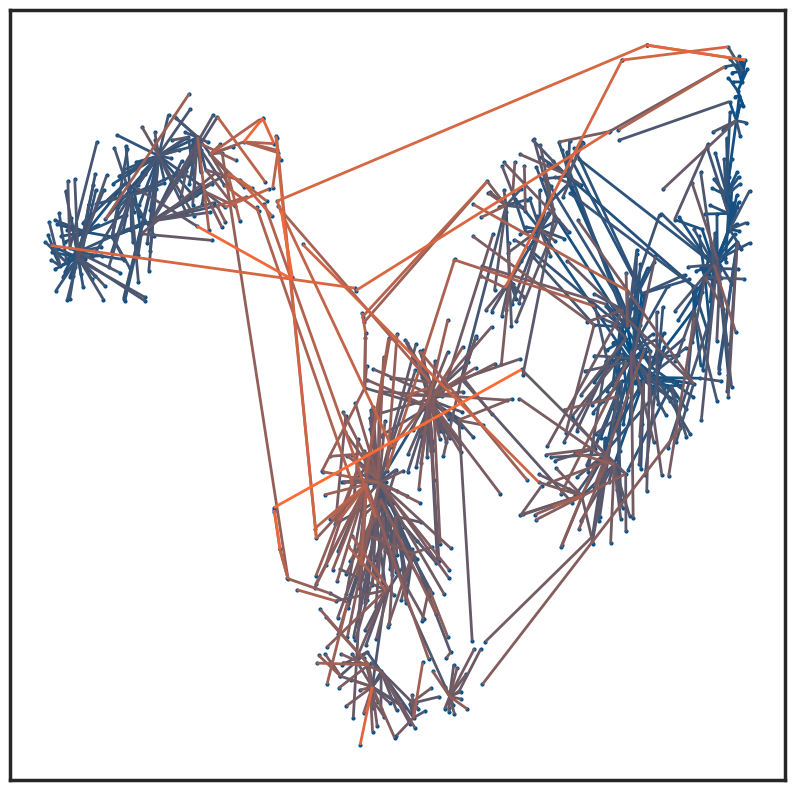

In [15]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)

clusterer.minimum_spanning_tree_.plot(colorbar=False, node_color=B, node_size=1, node_alpha=1, edge_alpha=1, edge_cmap=myCMAP, vary_line_width=False)

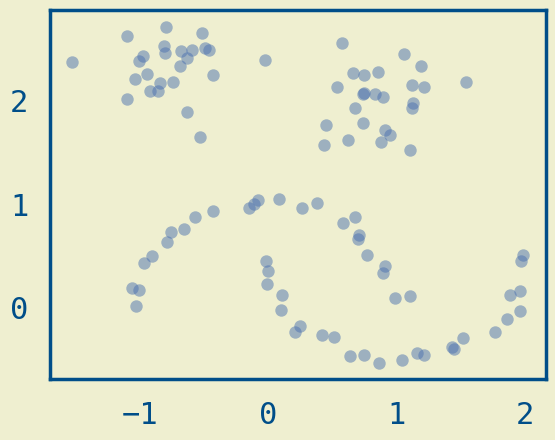

In [28]:
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)

In [29]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(test_data)

HDBSCAN(gen_min_span_tree=True)

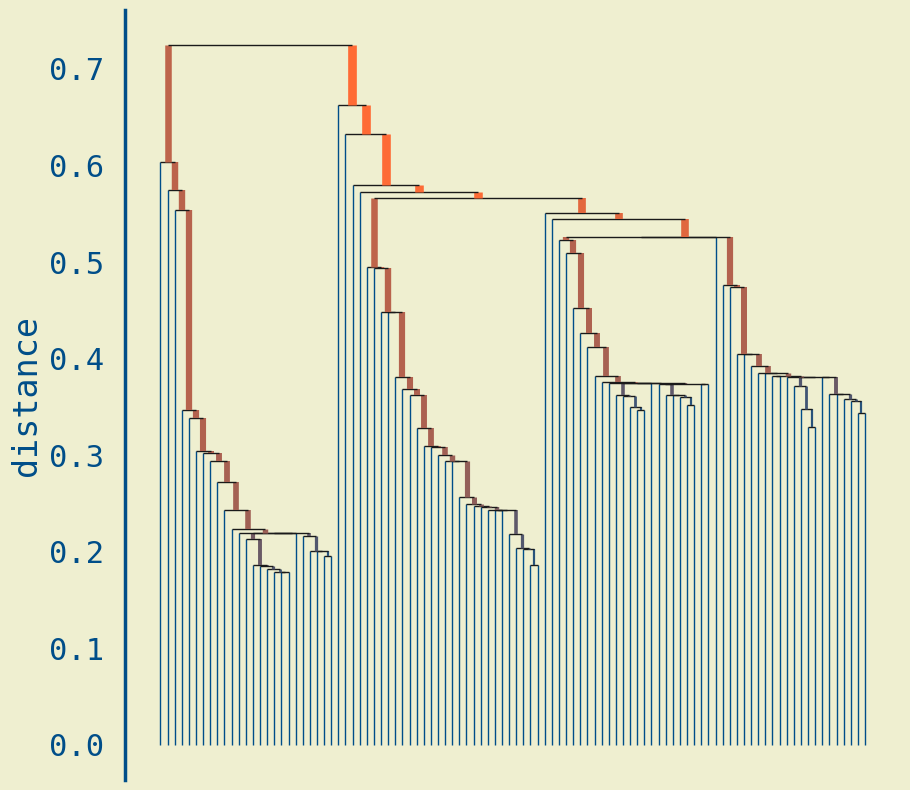

In [38]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)

clusterer.single_linkage_tree_.plot(cmap=myCMAP, colorbar=False)
plt.savefig("presentazione\\hdbscan_sing_linkage", dpi=1000)

<Axes: ylabel='$\\lambda$ value'>

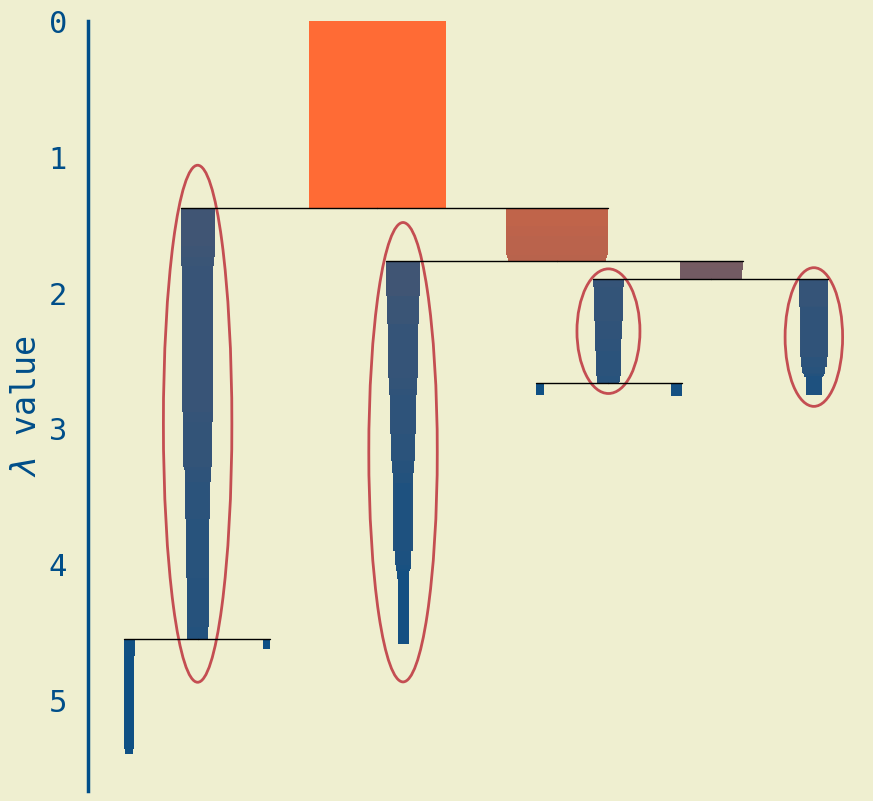

In [41]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)

clusterer.condensed_tree_.plot(leaf_separation=1, cmap=myCMAP, colorbar=False, select_clusters=True, max_rectangles_per_icicle=100)
#plt.savefig("presentazione\\hdbscan_condensed_tree", dpi=1000)